# Identifying Fraud at Enron Using Emails and Financial Data

## Project Introduction

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives.
For this project, predictive models were built using scikit learn, numpy, and pandas modules in Python. The target of the predictions were persons-of-interest (POI’s) who were ‘individuals who were indicted, reached a settlement, or plea deal with the government, or testified in exchange for prosecution immunity.’ Financial compensation data and aggregate email statistics from the Enron Corpus were used as features for prediction.

The goal of this project is to build a prediction model to identify persons-of-interest (POI’s.)

### Outline:

- [Understanding the Dataset](#lesson_1)
- [Developing a "Predictive Theory"](#lesson_2)
- [**PROJECT 1**: Performing Data Analysis of the Enron Dataset](#project_1)

- [Applying Regression](#lesson_1)
- [**PROJECT 2**: Outlier Investigation](#project_2)

- [Optimize Feature Selection/Engineering](#lesson_1)
- [**PROJECT 3**: Creating New Features](#project_2)

**Importing Necessary Libraries**

In [37]:
import sys
import pickle
import numpy as np
import pandas as pd
import sklearn
import matplotlib as plt
%matplotlib inline

In [38]:
import pickle

enron_data = pickle.load(open("C:/Users/Geekquad/ud120-projects/final_project/final_project_dataset_modified_unix.pkl", "rb"))

## Understanding the Dataset

### Data Exploration 

Addresses the most important characteristics of the dataset and uses these characteristics to inform their analysis.

**Important characteristics include: **
-  Size of the Enron Dataset
-  Features in the Enron Dataset 
-  Finding POI's in the Enron Data
-  Queries of the Dataset
- Follow the Money
- Dealing with Unfilled Features
- Missing POI's

In [39]:
print('Number of people in the Enron dataset: {0}'.format(len(enron_data)))

Number of people in the Enron dataset: 143


In [40]:
"""Change data dictionary to pandas DataFrame"""
df = pd.DataFrame.from_records(list(enron_data.values()))
persons= pd.Series(list(enron_data.keys()))
print(persons.head())
df.head

0          METTS MARK
1       BAXTER JOHN C
2      ELLIOTT STEVEN
3    CORDES WILLIAM R
4      HANNON KEVIN P
dtype: object


<bound method NDFrame.head of        bonus deferral_payments deferred_income director_fees  \
0     600000               NaN             NaN           NaN   
1    1200000           1295738        -1386055           NaN   
2     350000               NaN         -400729           NaN   
3        NaN               NaN             NaN           NaN   
4    1500000               NaN        -3117011           NaN   
5     325000               NaN             NaN           NaN   
6        NaN           1848227             NaN           NaN   
7    2600000               NaN             NaN           NaN   
8    1150000           2157527         -934484           NaN   
9     400000           1130036          -33333           NaN   
10       NaN           2964506             NaN           NaN   
11       NaN            774401             NaN           NaN   
12    850000               NaN             NaN           NaN   
13    700000               NaN             NaN           NaN   
14       N

In [41]:
pois = [x for x, y in enron_data.items() if y['poi']]
print('Number of POI\'s(Person Of Interests): {0}'.format(len(pois)))

Number of POI's(Person Of Interests): 16


In [42]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 21 columns):
bonus                        143 non-null object
deferral_payments            143 non-null object
deferred_income              143 non-null object
director_fees                143 non-null object
email_address                143 non-null object
exercised_stock_options      143 non-null object
expenses                     143 non-null object
from_messages                143 non-null object
from_poi_to_this_person      143 non-null object
from_this_person_to_poi      143 non-null object
loan_advances                143 non-null object
long_term_incentive          143 non-null object
other                        143 non-null object
poi                          143 non-null bool
restricted_stock             143 non-null object
restricted_stock_deferred    143 non-null object
salary                       143 non-null object
shared_receipt_with_poi      143 non-null object
to_messages    

In [43]:
""" Nmaes of all the users in the dataset """
enron_data.keys()

dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMA

In [44]:
enron_data['PRENTICE JAMES']

{'bonus': 'NaN',
 'deferral_payments': 564348,
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'james.prentice@enron.com',
 'exercised_stock_options': 886231,
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 208809,
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 564348,
 'total_stock_value': 1095040}

In [45]:
enron_data['PRENTICE JAMES']['total_stock_value']

1095040

In [46]:
enron_data['COLWELL WESLEY']['from_this_person_to_poi']

11

In [47]:
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 
                 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'] 

f = open('C:/Users/Geekquad/ud120-projects/final_project/poi_names.txt', 'r')


In [48]:
print('Columns:', list(df.columns.values))
print('Shape:', df.shape)
print('Number of POI in the dataset:', (df['poi'] == 1).sum())
print('Number of non-POI in the dataset:', (df['poi'] == 0).sum())

Columns: ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'email_address', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'poi', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']
Shape: (143, 21)
Number of POI in the dataset: 16
Number of non-POI in the dataset: 127


In [49]:
df.replace(to_replace='NaN', value=np.nan, inplace=True)
print(df.isnull().sum())

bonus                         64
deferral_payments            106
deferred_income               96
director_fees                127
email_address                 34
exercised_stock_options       44
expenses                      51
from_messages                 59
from_poi_to_this_person       59
from_this_person_to_poi       59
loan_advances                141
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    126
salary                        51
shared_receipt_with_poi       59
to_messages                   59
total_payments                21
total_stock_value             20
dtype: int64



There were 143 total records and 16 POIs in the original dataset.

All features have null data.

<hr> </hr>

The features in the data fall into three major types, namely 
- financial features
- email features
- POI labels.

Financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

Email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

POI label: [‘poi’] (boolean, represented as integer)

I'm going to try to use all features, filter them and choose the best.

### End of Project 1 
<hr> </hr>

## Regression (Outlier Investigation)

Identifying outlier(s) in the financial data, and explaining how they are removed or otherwise handled.

In [68]:
## Remove column from df if null counter > 65
for column, series in df.iteritems():
    if series.isnull().sum()> 65:
        df.drop(column, axis=1, inplace=True)
        
## Remove email address column
if 'email_address' in list(df.columns.values):
    df.drop('email_address', axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 14 columns):
bonus                      79 non-null float64
exercised_stock_options    99 non-null float64
expenses                   92 non-null float64
from_messages              84 non-null float64
from_poi_to_this_person    84 non-null float64
from_this_person_to_poi    84 non-null float64
other                      90 non-null float64
poi                        143 non-null bool
restricted_stock           107 non-null float64
salary                     92 non-null float64
shared_receipt_with_poi    84 non-null float64
to_messages                84 non-null float64
total_payments             122 non-null float64
total_stock_value          123 non-null float64
dtypes: bool(1), float64(13)
memory usage: 14.7 KB


In [52]:
# Impute the missing values
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='median', axis=0)
#imp.fit(df)
#df_imp = pd.DataFrame(imp.transform(df.copy(deep=True)))

df_imp = df.replace(to_replace=np.nan, value=0)
df_imp = df.fillna(0).copy(deep=True)
df_imp.columns = list(df.columns.values)

print(df_imp.isnull().sum())
print(df_imp.head())

df_imp.describe()

bonus                      0
exercised_stock_options    0
expenses                   0
from_messages              0
from_poi_to_this_person    0
from_this_person_to_poi    0
other                      0
poi                        0
restricted_stock           0
salary                     0
shared_receipt_with_poi    0
to_messages                0
total_payments             0
total_stock_value          0
dtype: int64
       bonus  exercised_stock_options  expenses  from_messages  \
0   600000.0                      0.0   94299.0           29.0   
1  1200000.0                6680544.0   11200.0            0.0   
2   350000.0                4890344.0   78552.0            0.0   
3        0.0                 651850.0       0.0           12.0   
4  1500000.0                5538001.0   34039.0           32.0   

   from_poi_to_this_person  from_this_person_to_poi      other    poi  \
0                     38.0                      1.0     1740.0  False   
1                      0.0            

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,1.430000e+02,1.430000e+02
mean,5.926127e+05,1.715504e+06,34719.447552,365.118881,37.552448,24.475524,2.267385e+05,7.235235e+05,1.714731e+05,676.384615,1191.972028,1.489942e+06,2.404233e+06
std,1.036924e+06,3.694149e+06,45235.547286,1455.675655,74.148184,80.080666,7.552178e+05,1.571184e+06,1.660404e+05,1066.923179,2223.860300,2.386745e+06,4.422592e+06
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.604490e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,8.929250e+04,2.148255e+05
50%,2.500000e+05,6.014380e+05,17355.000000,16.000000,1.000000,0.000000,8.910000e+02,3.466630e+05,2.061210e+05,91.000000,266.000000,9.114530e+05,9.543540e+05
75%,8.000000e+05,1.636136e+06,52688.500000,50.500000,39.500000,12.500000,1.492040e+05,6.801640e+05,2.670975e+05,869.000000,1504.000000,1.858492e+06,2.217787e+06
max,8.000000e+06,3.076606e+07,228763.000000,14368.000000,528.000000,609.000000,7.427621e+06,1.384707e+07,1.060932e+06,5521.000000,15149.000000,1.725253e+07,3.076606e+07


In [53]:
### Queries of the Dataset ###
enron_data['THE TRAVEL AGENCY IN THE PARK']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [69]:
# dropping row for 'THE TRAVEL AGENCY IN THE PARK'
park_index = list(enron_data.keys()).index('THE TRAVEL AGENCY IN THE PARK')
print(park_index)
df_imp_sub = df_imp.drop(df_imp.index[[park_index]])

98


In [55]:
enron_data['LOCKHART EUGENE E']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

In [59]:
# dropping row for 'LOCKHART EUGENE E'
lockhart_index = list(enron_data.keys()).index('LOCKHART EUGENE E')
print(lockhart_index)
df_imp_sub = df_imp.drop(df_imp.index[[park_index]])

89


- 'THE TRAVEL AGENCY IN THE PARK' was removed since it is not a person. 
- 'LOCKHART EUGENE E' was removed during data processing since this row had no entries for any feature.

### End of Project 2
<hr> </hr>

## Optimize Feature Selection/Engineering

In [62]:
enron_df = df_imp_sub

### Studying Financial Features: 

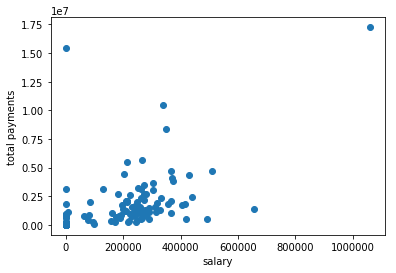

In [67]:
import matplotlib.pyplot as plt
plt.scatter(enron_df['salary'], enron_df['total_payments'])
plt.xlabel("salary")
plt.ylabel("total payments")
plt.show()

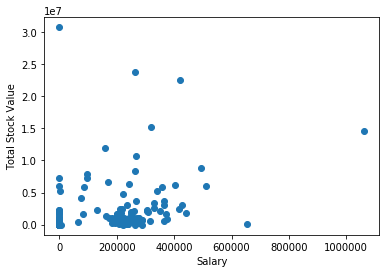

In [70]:
plt.scatter(enron_df['salary'], enron_df['total_stock_value'])
plt.xlabel("Salary")
plt.ylabel("Total Stock Value")
plt.show()

#### Creating New deatures for Financial Features

In [71]:
enron_df[enron_df['total_stock_value'].isnull()]

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
